# COVID-19 in Madrid

## Introduction

On March 13, after the outbreak of COVID-19 in Spain, the central government in Madrid [declared the state of alarm](https://english.elpais.com/society/2020-03-15/spains-state-of-alarm-the-key-measures-that-are-now-in-place.html). Under this state, the movements of citizens will be very limited. This decree will affect the whole of Spain during 15 days although, to be honest, it will probably take longer. Motivated by [previous articles](https://www.businessinsider.com/quarantines-air-pollution-china-but-wont-last-for-long-expert-2020-3?IR=T) on the decreased pollution that has been observed in China, I want to see if our lockdown will have a similar impact in our air quality.

The aim of this project is to analyse air quality parameters day by day since March 12. I am going to extend this project as much as possible, so I can also observe how long it takes us to get Madrid back to our usual pollution levels. My hope is to provide people with enough data to make them think about the impact of our habits in our environment. 

## Assessing the air quality

### Getting the data

I wrote a Bash script (*data_script.sh*) that sends a request to the servers of Madrid city hall to get the daily [air quality data](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=aecb88a7e2b73410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) as a CSV file.

We will primarily focus on some famous places:

- 28079027 - Barajas
- 28079050 - Plaza de Castilla
- 28079048 - Paseo de la Castellana
- 28079038 - Cuatro Caminos
- 28079035 - Plaza de España

And the magnitudes to be studied are:
* 1 - SO2
* 6 - CO
* 7 - NO
* 8 - NO2
* 10 - PM10
* 12 - NOx
* 14 - O3
* 44 - NMHC

I might change these magnitudes in the future (basically I just picked them randomly). However, I find Barajas very interesting as it is close to the airport, which has significantly reduced the number of flights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

check_places = {'28079027':'Barajas','28079050':'Plaza de Castilla','28079048':'Pº de la Castellana','28079038':'Cuatro Caminos','28079035':'Plaza de España'}
measurements = {1:'SO2',6:'CO',7:'NO',8:'NO2',10:'PM10',12:'NOx',14:'O3',44:'NMHC'}
#check_times = ['H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24']
check_times = ['H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23']

hours = range(1,25)

In [2]:
# Merge all the csv files in one data frame
files = glob.glob('air_data/*.csv')

df = pd.read_csv(files[0],delimiter=';')
all_data = pd.DataFrame(columns=df.columns)

for f in files:
    df = pd.read_csv(f,delimiter=';')
    all_data = pd.concat([all_data,df])

# Save this new data frame
all_data.to_csv('all_data.csv',index=False)

# Show a preview of the data frame
all_data.head(5)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,8,1,28079008_1_38,2020,3,12,10.0,V,...,8.0,V,8.0,V,9.0,V,0,N,0,N
1,28,79,8,6,28079008_6_48,2020,3,12,1.0,V,...,0.7,V,0.6,V,0.7,V,0,N,0,N
2,28,79,8,7,28079008_7_8,2020,3,12,120.0,V,...,31.0,V,30.0,V,33.0,V,0,N,0,N
3,28,79,8,8,28079008_8_8,2020,3,12,104.0,V,...,86.0,V,85.0,V,92.0,V,0,N,0,N
4,28,79,8,9,28079008_9_47,2020,3,12,34.0,V,...,10.0,V,11.0,V,13.0,V,0,N,0,N


### What am I going to study?

In first place, I just want to plot the average 'amount' of each magnitude (CO, O3, NOx...) and see how they evolve during the lockdown. Another interesting thing to do would be taking just the peak hours (from 7 to 10 in the morning and 6 to 9 in the evening)



Sample: SO2
Barajas
	No data for this sample and location
Plaza de Castilla
	No data for this sample and location
Pº de la Castellana
	No data for this sample and location
Cuatro Caminos


C:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plaza de España


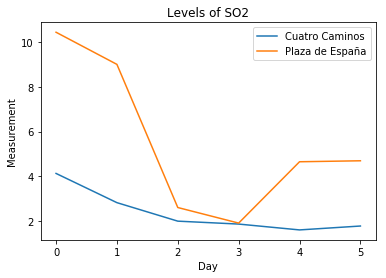



Sample: CO
Barajas
	No data for this sample and location
Plaza de Castilla
	No data for this sample and location
Pº de la Castellana
	No data for this sample and location
Cuatro Caminos
	No data for this sample and location
Plaza de España


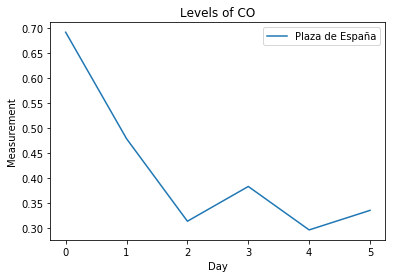



Sample: NO
Barajas
Plaza de Castilla
Pº de la Castellana
Cuatro Caminos
Plaza de España


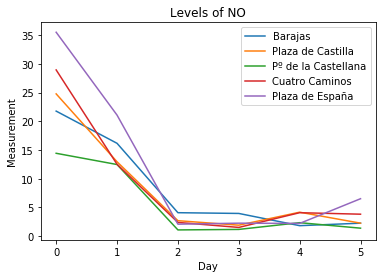



Sample: NO2
Barajas
Plaza de Castilla
Pº de la Castellana
Cuatro Caminos
Plaza de España


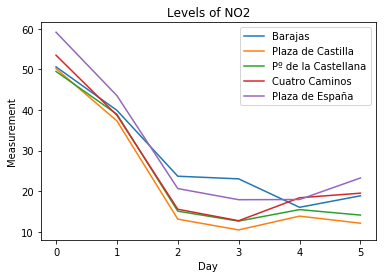



Sample: PM10
Barajas
	No data for this sample and location
Plaza de Castilla
Pº de la Castellana
Cuatro Caminos
Plaza de España
	No data for this sample and location


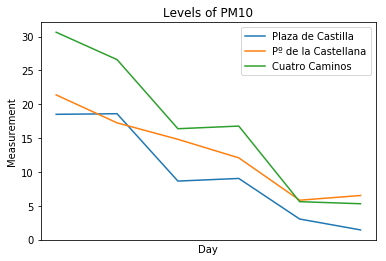



Sample: NOx
Barajas


In [ ]:
# Plotting the average value for each day

for m_code,m_name in measurements.items():
    days = []
    print('\n\nSample: ' + m_name)
    for code, location in check_places.items():
        print(location)
        df = all_data.loc[(all_data['MAGNITUD']==m_code) & (all_data['PUNTO_MUESTREO'].str.contains(code))].copy()
        df.sort_values(['MES','DIA'])
        df = df.reset_index()
        df['NUMDIA'] = df.index
                
        if df.shape[0] != 0:
            all_times = df[check_times].copy()
            for t in check_times:
                all_times[t] = pd.to_numeric(all_times[t])
            all_times['MEDIO'] = all_times.mean(axis=1)
            plt.plot(df['NUMDIA'],all_times['MEDIO'])
            days.append(location)
        else:
            print('\tNo data for this sample and location')
    
    if len(days)>0:
        plt.legend(days)
        plt.xticks(df['NUMDIA'])        
        plt.xlabel('Day')
        plt.ylabel('Measurement')
        plt.title('Levels of '+m_name)
        plt.show()